<a href="https://colab.research.google.com/github/AssiaThabet/first_git/blob/main/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Метод борьбы с переобучением

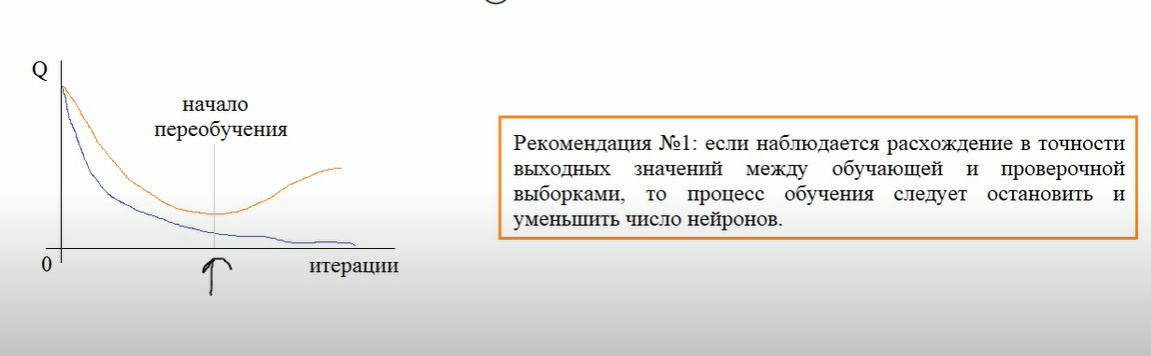

Цель алгоритма dropout - снизить узкую специализацию каждого нейрона

Суть такая - с каждой итерацией убирать некое кол-во нейронов, тогда другие нейроны будут брать на себя функции тех. Нейроная сеть научится обобщать результат и получится избежать переобучения.

Рассмотрим метод в слеующей нейронной сети.


Epoch 1/50
157/157 [==============================] - 2s 7ms/step - loss: 0.5799 - accuracy: 0.8358 - val_loss: 0.3331 - val_accuracy: 0.9096
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 0.2415 - accuracy: 0.9342 - val_loss: 0.2996 - val_accuracy: 0.9140
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 0.1711 - accuracy: 0.9550 - val_loss: 0.2497 - val_accuracy: 0.9260
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.1255 - accuracy: 0.9668 - val_loss: 0.2522 - val_accuracy: 0.9250
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.0912 - accuracy: 0.9770 - val_loss: 0.2318 - val_accuracy: 0.9278
Epoch 6/50
157/157 [==============================] - 1s 6ms/step - loss: 0.0646 - accuracy: 0.9856 - val_loss: 0.2408 - val_accuracy: 0.9242
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.0472 - accuracy: 0.9918 - val_loss: 0.2208 - val_accuracy: 0.9354
Epoch 

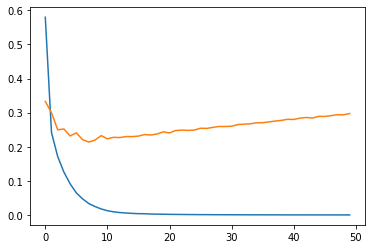

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    Dense(10, activation='softmax') ])

# print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train_data, y_train_data, epochs=50, batch_size=32, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

График выборки валидации и обучающео множества начал расходится.
Давайте запусти тот же самый код, только импортируем dropout b в создании модели укажем так:


```
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    Dropout(0.8),
    Dense(10, activation='softmax') ])
```



Epoch 1/50
157/157 [==============================] - 2s 7ms/step - loss: 1.1058 - accuracy: 0.6466 - val_loss: 0.4652 - val_accuracy: 0.8774
Epoch 2/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5750 - accuracy: 0.8224 - val_loss: 0.3655 - val_accuracy: 0.8982
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4712 - accuracy: 0.8566 - val_loss: 0.3194 - val_accuracy: 0.9048
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4063 - accuracy: 0.8744 - val_loss: 0.2917 - val_accuracy: 0.9102
Epoch 5/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3699 - accuracy: 0.8876 - val_loss: 0.2757 - val_accuracy: 0.9168
Epoch 6/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3392 - accuracy: 0.9034 - val_loss: 0.2636 - val_accuracy: 0.9186
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3265 - accuracy: 0.9008 - val_loss: 0.2552 - val_accuracy: 0.9228
Epoch 

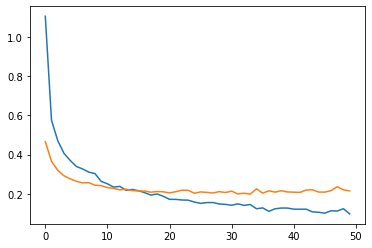

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    Dropout(0.8),
    Dense(10, activation='softmax') ])

# print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train_data, y_train_data, epochs=50, batch_size=32, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

Как мы видим, метод позволил оставить модель без переобучения